In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# From lesson 2: Importing CSV data, and viewing the first 10 rows
events = pd.read_csv("./data/events.csv")
# events.info()
# events.head(10)

ginf = pd.read_csv("./data/ginf.csv")
# ginf.info()
# ginf.head(10)

In [ ]:
events_data = ginf.merge(events, how="left")
events_data.head(10)

In [ ]:
f = open("./data/dictionary.txt")
data = f.read()
print(data)

In [ ]:
# Separate the different types of information
data = data.split("\n\n\n")
print(data)

In [ ]:
print(data)

In [ ]:
f = open("./data/dictionary.txt")
data = f.read()
data_list = data.split("\n\n\n")
print(data_list)

In [ ]:
new = dict() # title as key, dictionary as value

for adwaita in data_list:

    # Ignore empty values
    if not adwaita:
        break

    adwaita_list = adwaita.split("\n")
    title = adwaita_list[0] # Key for top dictionary
    values = adwaita_list[1:]

    # Split and save values in a dictionary
    temp_dict = dict() # integer as key, string as value
    # Go through each element of values
    for value in values:
        # Separate number and word that is separated by \t
        jerry = value.split("\t")
        number = int(jerry[0])
        text = jerry[1]
        # Save things to dictionary ([key] = value)
        temp_dict[number] = text

    new[title] = temp_dict

print(new)


In [ ]:
for name in new:
    events_data[name] = events_data[name].map(new[name])

events_data.head(10)

In [ ]:
lionel_messi_events = events_data.loc[events_data["player"] == "lionel messi"]
lionel_messi_events.head(5)

In [ ]:

lionel_messi_goals = lionel_messi_events.loc[events_data["is_goal"] == 1]
lionel_messi_goals.head(10)


In [ ]:
lionel_messi_matches_per_season = lionel_messi_goals.groupby("season")
lionel_messi_matches_per_season.count()
# lionel_messi_matches_per_season.sum()
# lionel_messi_matches_per_season.mean()

In [ ]:
lionel_messi_matches_per_season_goals = lionel_messi_matches_per_season.count().reset_index()
lionel_messi_matches_per_season_goals

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lionel_messi_matches_per_season_goals["season"], lionel_messi_matches_per_season_goals["is_goal"])
plt.xlabel("Season")
plt.ylabel("Number of Goals")
plt.title("Season to Goals")
plt.show()

In [62]:
goals_from_assists = lionel_messi_goals.loc[lionel_messi_goals["assist_method"] != None]

lionel_messi_goals_from_assists = goals_from_assists.groupby("player2").count().reset_index()
lionel_messi_goals_from_assists


,player2,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,adriano,5,5,5,5,5,5,5,5,5,...,0,0,5,5,5,5,5,5,5,5
1,alexis sanchez,10,10,10,10,10,10,10,10,10,...,0,0,10,10,10,10,10,10,10,10
2,andres iniesta,13,13,13,13,13,13,13,13,13,...,0,0,13,13,13,13,13,13,13,13
3,arda turan,3,3,3,3,3,3,3,3,3,...,0,0,3,3,3,3,3,3,3,3
4,cesc fabregas,10,10,10,10,10,10,10,10,10,...,0,0,10,10,10,10,10,10,10,10
5,cristian tello,3,3,3,3,3,3,3,3,3,...,0,0,3,3,3,3,3,3,3,3
6,dani alves,12,12,12,12,12,12,12,12,12,...,0,0,11,12,12,12,12,12,12,12
7,david villa,4,4,4,4,4,4,4,4,4,...,0,0,4,4,4,4,4,4,4,4
8,francesc fabregas,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
9,gerard pique,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1


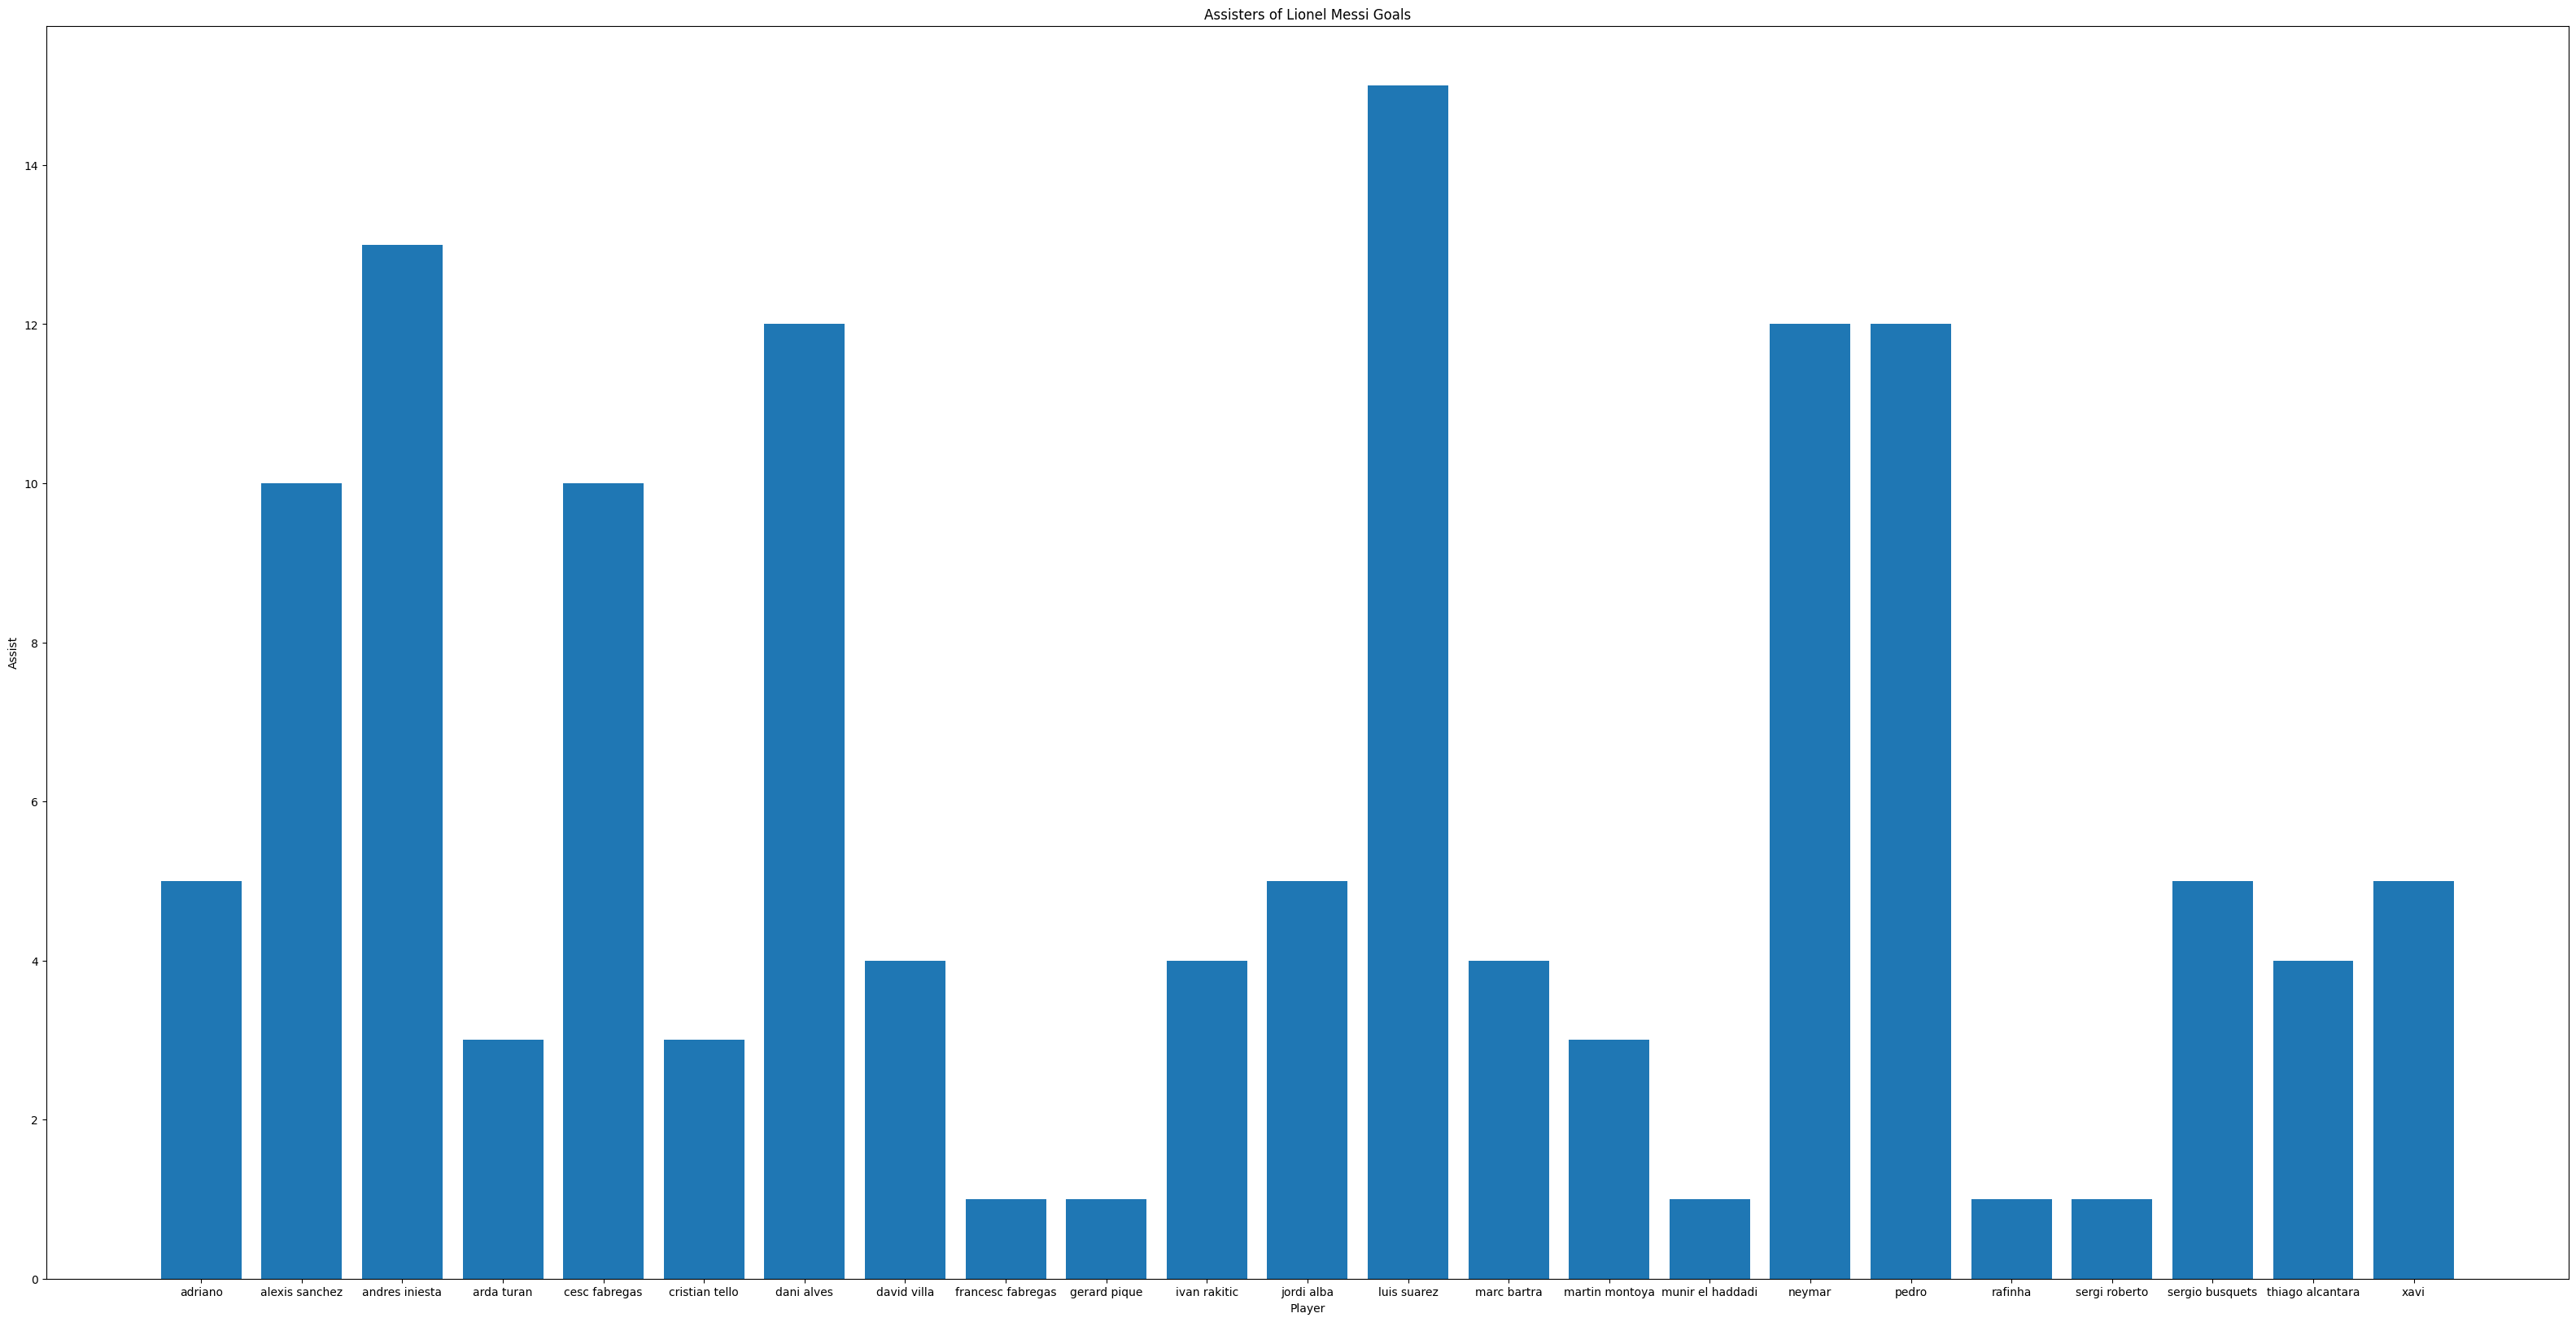

In [79]:
# plt.plot(lionel_messi_matches_per_season_goals["season"], lionel_messi_matches_per_season_goals["is_goal"])

plt.figure(figsize=(40, 20))
plt.bar(lionel_messi_goals_from_assists["player2"], lionel_messi_goals_from_assists["assist_method"])
plt.title("Assisters of Lionel Messi Goals")
plt.xlabel("Player")
plt.ylabel("Assist")
plt.show()


In [68]:
df_test = pd.DataFrame({'Animal': ['Falcon', 'Falcon', 'Eagle', 'Eagle', 'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 150, 120, 24., 26.]})
df_test

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Eagle,150.0
3,Eagle,120.0
4,Parrot,24.0
5,Parrot,26.0


In [69]:
df_test.groupby(["Animal"]).mean()

,Max Speed
Animal,
Eagle,135.0
Falcon,375.0
Parrot,25.0
